In [1]:
# Importing desired libraries required for the program
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
service = QiskitRuntimeService()

simulation_sampler = Sampler(service.least_busy(simulator=True,operational=True))

## Question 1
### Quantum Teleportation

Quantum teleportation is an important application of entangled states. Explanation of Quantum Teleporation is given below. Note that, in our convention, the 0th bit is taken as the unknown bit (the one we're trying to transport), while the 1st and 2nd bits are the entangled bits, and Alice has the 1st bit while Bob has the 2nd bit.

### The algorithm:

1. Assume that Alice (denoted by A) and Bob (denoted by B) each have a qubit from a shared entangled pair whose wave function is ${\left|\Phi^{+}\right\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle_A|0\rangle_B+|1\rangle_A|1\rangle_B\right)}$

Alice wants to teleport another qubit in an unknown quantum state $|\phi\rangle=\alpha|0\rangle+\beta|1\rangle$ to Bob.

The total wave function $\left|\psi_1\right\rangle$ of all the qubits is
$$
\begin{gathered}
\left|\psi_1\right\rangle=|\phi\rangle \otimes\left|\Phi^{+}\right\rangle = \frac{1}{\sqrt{2}}\left(\alpha|0\rangle_A|0\rangle_A|0\rangle_B+\alpha|0\rangle_A|1\rangle_A|1\rangle_B+\beta|1\rangle_A|0\rangle_A|0\rangle_B+\beta|1\rangle_A|1\rangle_A|1\rangle_B\right)
\end{gathered}
$$

2. Next, Alice applies the CNOT gate to her two qubits using the unknown qubit as the control and the qubit from the entangled pair as the target
$$
\left|\psi_2\right\rangle=\frac{1}{\sqrt{2}}\left(\alpha|0\rangle_A|0\rangle_A|0\rangle_B+\alpha|0\rangle_A|1\rangle_A|1\rangle_B+\beta|1\rangle_A|1\rangle_A|0\rangle_B+\beta|1\rangle_A|0\rangle_A|1\rangle_B\right)
$$
3. Then, Alice applies the Hadamard gate to the qubit in the unknown state
$
\left|\psi_3\right\rangle=\frac{1}{\sqrt{2^3}}\left(\alpha|0\rangle_A|0\rangle_A|0\rangle_B+\alpha|1\rangle_A|0\rangle_A|0\rangle_B+\alpha|0\rangle_A|1\rangle_A|1\rangle_B+\alpha|1\rangle_A|1\rangle_A|1\rangle_B+\beta|0\rangle_A|1\rangle_A|0\rangle_B-\beta|1\rangle_A|1\rangle_A|0\rangle_B+\beta|0\rangle_A\right.
$

4. Alice measures the state of her two qubits and communicate two bits of classical information to Bob to inform him of the outcome of her measurements. The system collapses to one of the four following states:

- $\left|\psi_4\right\rangle=\frac{1}{\sqrt{2}}\left(\alpha|0\rangle_A|0\rangle_A|0\rangle_B+\beta|0\rangle_A|0\rangle_A|1\rangle_B\right)$

- $\left|\psi_4\right\rangle=\frac{1}{\sqrt{2}}\left(\alpha|0\rangle_A|1\rangle_A|1\rangle_B+\beta|0\rangle_A|1\rangle_A|0\rangle_B\right)$

- $\left|\psi_4\right\rangle=\frac{1}{\sqrt{2}}\left(\alpha|1\rangle_A|0\rangle_A|0\rangle_B-\beta|1\rangle_A|0\rangle_A|1\rangle_B\right)$

- $\left|\psi_4\right\rangle=\frac{1}{\sqrt{2}}\left(\alpha|1\rangle_A|1\rangle_A|1\rangle_B-\beta|1\rangle_A|1\rangle_A|0\rangle_B\right)$

5. Depending on the values of the classical bits which Bob receives from Alice, he will apply one of four possible gates to his qubit A.

If the classical bit's 0th bit is 1, we apply the Z-gate, If the classical bit's 1st bit is 1, we apply the X-gate.

Therefore, Bob is able to reproduce the state $|\phi\rangle$ on his qubit

In our case, assume the bit Alice is trying to transport is $|0 \rangle$, with 

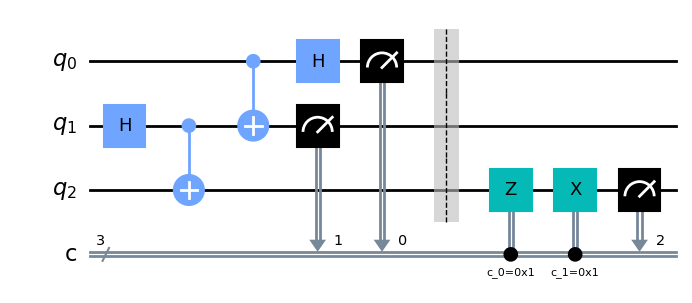

In [3]:
qc = qiskit.QuantumCircuit(3, 3)

# --------------- Alice --------------

# Making the shared entangled state
qc.h(1)
qc.cx(1, 2)

# Whatever state we want from Alice's side, just put it here
# qc.h(0)

# --------------- Transport --------------

# Alice applies teleportation gates (or projects to Bell basis)
qc.cx(0, 1)
qc.h(0)

# Alice measures her qubits
qc.measure(0, 0)
qc.measure(1, 1)

qc.barrier()

# --------------- Bob --------------

# Bob applies certain gates based on the outcome of Alice's measurements
qc.z(2).c_if(0, 1)
qc.x(2).c_if(1, 1)

# Bob checks the state of the teleported qubit
qc.measure(2, 2)

qc.draw()

base_primitive._run_primitive:INFO:2023-11-30 16:28:41,739: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


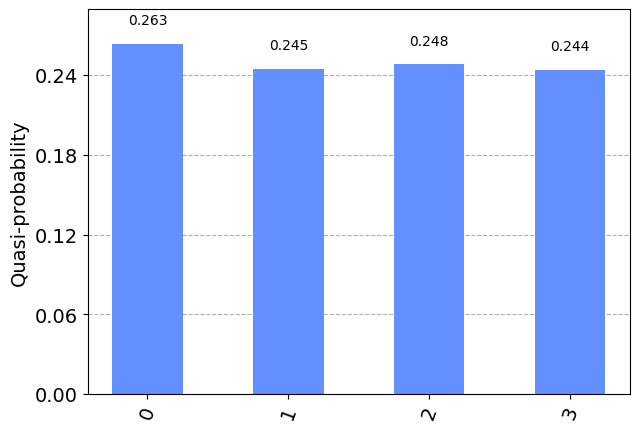

In [4]:
job_simulation = simulation_sampler.run(qc)
counts = job_simulation.result().quasi_dists

# Plot the Results
plot_histogram(counts)

Since Alice's qubit we were trying to teleport is $|0 \rangle$, in the output we get $|000\rangle, |001\rangle, |010\rangle, |011\rangle$ with equal probability, so we've successfully teleported the desired qubit.

## Question 2
### Superdense Coding

The fundamental idea of Superdense coding is that we can represent two classical bits of information using just a single entangled qubit.

The steps in this process are as follows:

- Say Alice has two classical bits, $00, 01, 10, \text{or} 11$.
- Create an entagled qubit, say $\frac{1}{\sqrt{2}}| 00 \rangle + \frac{1}{\sqrt{2}} |11 \rangle$, and let the first of these qubits be with Alice and the second qubit be with Bob.
- Do the following thing:
  - If the classical bits are $00$, apply the identity operation on her qubit, resulting in $\frac{1}{\sqrt{2}}| 00 \rangle + \frac{1}{\sqrt{2}} | 11 \rangle$
  - If the classical bits are $01$, apply the NOT gate (Pauli X gate) on Alice's bit, resulting in $\frac{1}{\sqrt{2}}| 10 \rangle + \frac{1}{\sqrt{2}} | 01 \rangle$
  - If the classical bits are $10$, apply the Phase flip gate (Pauli Z gate) $\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$, resulting in $\frac{1}{\sqrt{2}}| 00 \rangle - \frac{1}{\sqrt{2}} | 11 \rangle$
  - If the classical bits are $11$, apply the Pauli Y gate gate $\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$, resulting in $\frac{1}{\sqrt{2}}| 01 \rangle - \frac{1}{\sqrt{2}} | 10 \rangle$ (excluding the overall phase)
  
Now, Alice transmits her single qubit to Bob.

Bob does a CNOT with Alice's Bit as control qubit and B's bit as target bit, then does Hadamard on A bit. The resultant state ends up being exactly Alice's classical message!

Note: Our convention is Alice has bit "1" in the state and Bob has bit "0" in the state

base_primitive._run_primitive:INFO:2023-11-30 16:28:44,879: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


The message is message='00'


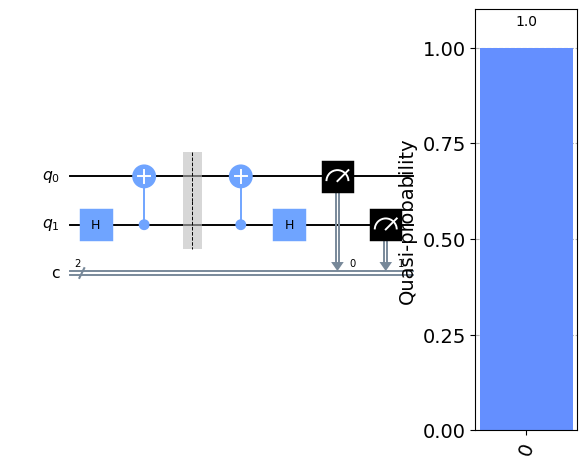

base_primitive._run_primitive:INFO:2023-11-30 16:28:48,191: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


The message is message='01'


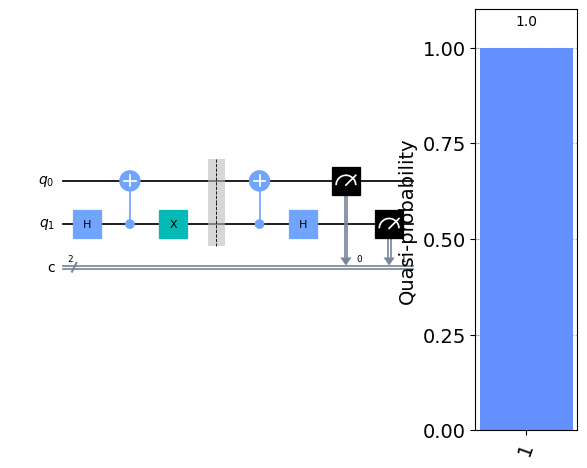

base_primitive._run_primitive:INFO:2023-11-30 16:28:51,136: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


The message is message='10'


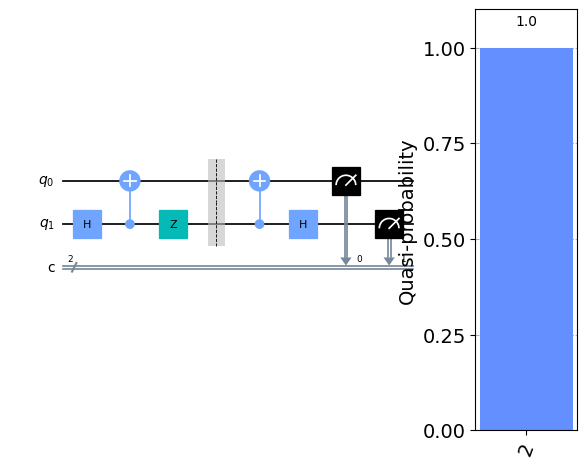

base_primitive._run_primitive:INFO:2023-11-30 16:28:55,507: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


The message is message='11'


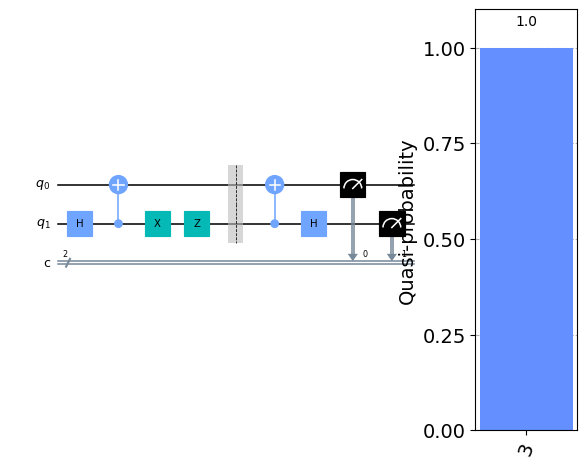

In [5]:
def superdense (message):

    def encode_message(qc, msg):

        if msg[1] == "1":
            qc.x(1)
        if msg[0] == "1":
            qc.z(1)
        return qc

    # ------------------------ Alice ------------------------

    print(f"The message is {message=}")
    
    qc = qiskit.QuantumCircuit(2, 2)
    qc.h(1)
    qc.cx(1, 0)

    qc = encode_message(qc, message)
    qc.barrier()

    # ------------------------ Bob ------------------------

    qc.cx(1, 0)
    qc.h(1)
    qc.measure(0, 0)
    qc.measure(1, 1)

    # Draw our output
    fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios':[2,0.5]})
    fig.tight_layout()
    
    qc.draw(interactive = True, ax = axes[0])        

    job_simulation = simulation_sampler.run(qc)
    plot_histogram(job_simulation.result().quasi_dists, ax = axes[1])
    
    plt.show()
    
superdense("00")
superdense("01")
superdense("10")
superdense("11")

## Question 3

Let us assume we have a sender Bob and a receiver Alice. We can teleport an entangled state of two qubits using a W state. The source for this can be found in this paper:
https://www.sciencedirect.com/science/article/pii/S0378437104011434

1. Prepare the W-class State (Entangled State):
    - Apply a Hadamard gate (H) to the first qubit (q0).
    - Apply controlled-X (CNOT) gates to create entanglement between q0, q1, and q2.
    - Apply Hadamard gate (H) to q0 again.
    - Apply CNOT gates to entangle q0 and q3, and q1 and q4.

2. Alice Performs a Bell Measurement:
    - Apply a CNOT gate from q2 to q3.
    - Apply a Hadamard gate (H) to q2.

3. Communication of Measurement Results:
    - Apply CNOT and Controlled-Z (CZ) gates to communicate the measurement results from Alice (sender) to Bob (receiver).

4. Bob Applies Corrections:
    - Based on the communicated information, Bob applies CNOT and CZ gates to correct his qubits (q4).

5. Measure the Result:
    - Perform measurements on q3 and q4 and store the outcomes in classical bits (c0 and c1).

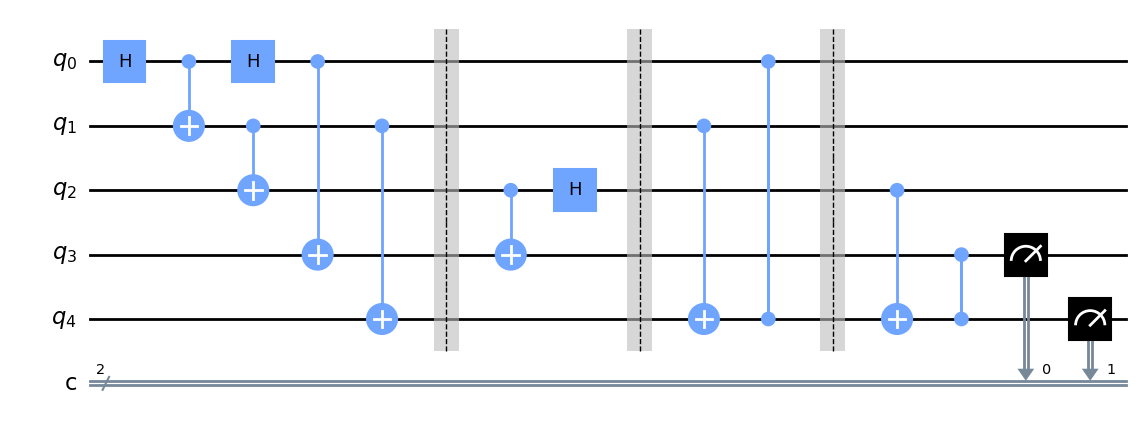

In [6]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

# Create a Quantum Circuit
qc = QuantumCircuit(5, 2)

# ------------------ Alice ----------------
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.h(0)
qc.cx(0, 3)
qc.cx(1, 4)
qc.barrier()

# Performing the Bell measurement
qc.cx(2, 3)
qc.h(2)
qc.barrier()

# ------------------ Transport across classical channel ----------------
qc.cx(1, 4)
qc.cz(0, 4)
qc.barrier()

# ------------------ Bob ----------------

# Step 4: Bob applies corrections based on Alice's measurements
qc.cx(2, 4)
qc.cz(3, 4)

# Measure the result
qc.measure([3, 4], [0, 1])

# Draw the circuit
qc.draw(output='mpl')

base_primitive._run_primitive:INFO:2023-11-30 16:28:58,913: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


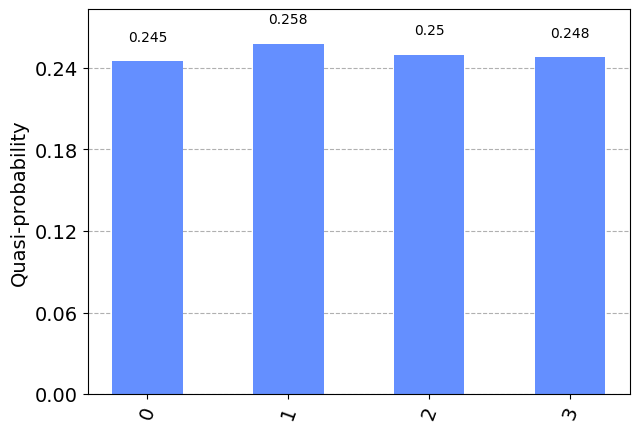

In [7]:
job_simulation = simulation_sampler.run(qc)
counts = job_simulation.result().quasi_dists

# Plot the Results
plot_histogram(counts)

We get the same output in Alice's side and Bob's side, as expected! 

## Question 4
### BB84 Quantum Key distribution Circuit

Let's start off with a one-bit case

Say Alice has one bit, she's transmitting that through some channel.

Alice does the following:

- Applies a Hadamard gate on it
- Transmits it through a public channel

Bob does the following:

- Applies H gate on the received bit
- Measures it

### a) Without interception

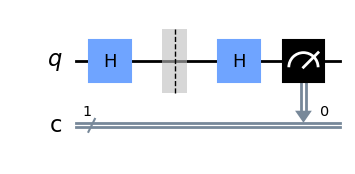

In [ ]:
qc = qiskit.QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
qc.barrier()
# Alice now sends the qubit to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())

base_primitive._run_primitive:INFO:2023-11-30 16:29:04,896: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


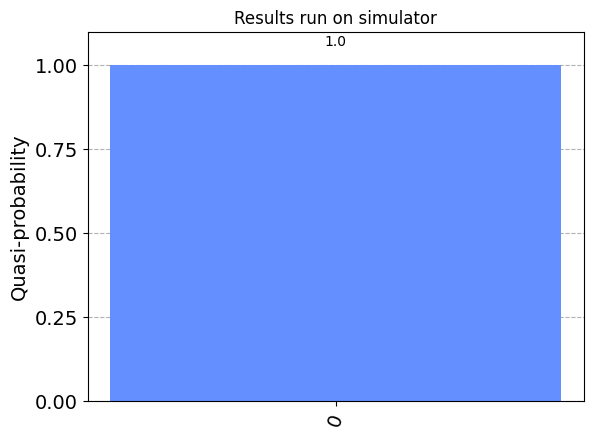

In [ ]:
# Plotting the results obtained side-by-side, to ensure that they match

fig, axes = plt.subplots(1, 1)

job_simulation = simulation_sampler.run(qc)
plot_histogram(job_simulation.result().quasi_dists, ax = axes)
axes.set_title("Results run on simulator");

### b) With Interception

The interesting thing is, say there was some Eavesdropper called Eve, they would collapse the state (which can be $|+\rangle$ or $|-\rangle$, leading to a measurement of $|0>$ or $|1>$ with equal probability. Since the state has collapsed, Bob measures $|0\rangle$ and $|1\rangle$ with equal probability, so he knows that the Channel is compromised.

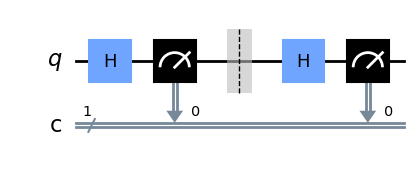

In [ ]:
qc = qiskit.QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
# Alice now sends the qubit to Bob
# but Eve intercepts and tries to read it
qc.measure(0, 0)
qc.barrier()
# Eve then passes this on to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

qc.draw()

base_primitive._run_primitive:INFO:2023-11-30 16:29:08,940: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


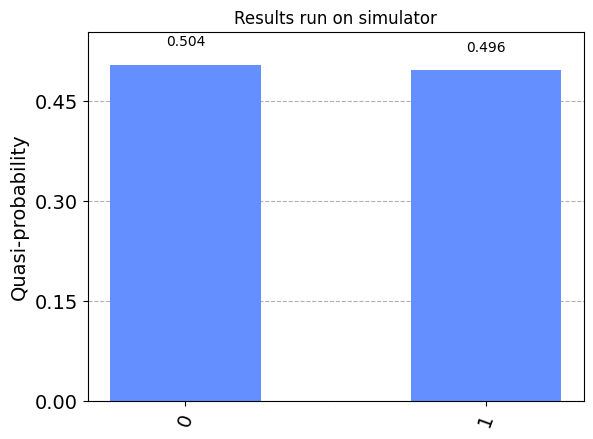

In [ ]:
# Plotting the results obtained side-by-side, to ensure that they match

fig, axes = plt.subplots(1, 1)

job_simulation = simulation_sampler.run(qc)
plot_histogram(job_simulation.result().quasi_dists, ax = axes)
axes.set_title("Results run on simulator");